
# K-Means Clustering

[(11, 6), (16, 21), (1, 20), (10, 5), (19, 23), (6, 20), (6, 10), (20, 23), (7, 15), (9, 5), (21, 20), (4, 16), (7, 8), (19, 20), (4, 19), (6, 5), (20, 23), (1, 15), (6, 9), (20, 25), (3, 19), (10, 10), (15, 23), (3, 17), (11, 9), (16, 21), (7, 17), (9, 10), (19, 20), (4, 18)]


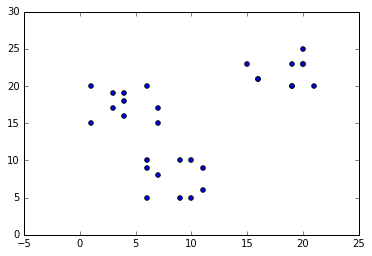

In [2]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import math

cents = [(5,5), (15,20), (1,15)]
points = []
for i in range(10):
    for c in cents:
        points.append(tuple([c[0]+random.randrange(7),c[1]+random.randrange(7)]))

print(points)

plt.scatter([x[0] for x in points],[x[1] for x in points])
plt.show()

In [8]:
k = 3

def chooseCentroids(k,points):
    centroids = random.sample(points,k)
    print(centroids)

    cluster_keeper = {}
    for c in centroids:
        cluster_keeper[c] = []
    return cluster_keeper

def edist(p1,p2):
    tot = 0
    for i in range(len(p1)):
        diff = (p1[i]-p2[i])**2
        tot = tot + diff
    return math.sqrt(tot)

def createClusters(k, points, ck, it):
    for i in range(it):
        for p in points:
            minC = None
            minD = 99999
            for c in ck:
                dist = edist(c,p)
                if dist < minD:
                    minC = c
                    minD = dist
            ck[minC].append(p)
        newck = {}
        for k in ck:
            x = sum([x[0] for x in ck[k]])/len(ck[k])
            y = sum([x[1] for x in ck[k]])/len(ck[k])
            newck[(x,y)] = []
        if i < it-1:
            ck = newck

    return ck


[(20, 25), (4, 16), (11, 9)]
{(18.5, 21.9): [(16, 21), (19, 23), (20, 23), (21, 20), (19, 20), (20, 23), (20, 25), (15, 23), (16, 21), (19, 20)], (4.0, 17.6): [(1, 20), (6, 20), (7, 15), (4, 16), (4, 19), (1, 15), (3, 19), (3, 17), (7, 17), (4, 18)], (8.5, 7.7): [(11, 6), (10, 5), (6, 10), (9, 5), (7, 8), (6, 5), (6, 9), (10, 10), (11, 9), (9, 10)]}


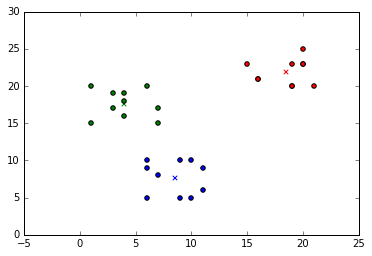

In [9]:
ck = createClusters(k,points,chooseCentroids(k,points),14)
print(ck)
clrs = 'rgbyp'

for i,k in enumerate(ck):
    plt.scatter(k[0],k[1],c=clrs[i],marker='x')
    plt.scatter([x[0] for x in ck[k]],[x[1] for x in ck[k]],c=clrs[i],marker='o')

plt.show()


## Or from SciKit Learn

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2], dtype=int32)

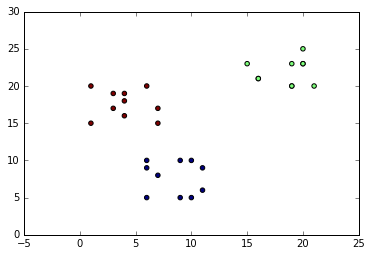

In [14]:
from sklearn.cluster import KMeans
kmm = KMeans(3,n_init=30)
kmm.fit(points)
kmm_label = kmm.predict(points)
plt.scatter([x[0] for x in points], [x[1] for x in points], c=kmm_label)
kmm_label

## Two projects

1.  Try the hand coded algorithm on the iris data.  Compare and figure out how well it clusters the different varieties of iris into the correct cluster.
2.  In image processing

    1.  Choose an image
    2.  Apply KMeans clustering to the color tuples
    3.  display the original image
    4.  create a new image using the centroids to stand in for the colors you chose.


In [21]:
from PIL import Image
im = Image.open('delta.png')

pixels = list(im.getdata())

#width, height = im.size
#pixels = [pixels[i * width:(i + 1) * width] for i in xrange(height)]

## Now reshape the data and use plt.imshow